In [185]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# loading the data

In [187]:
df=pd.read_csv("MoviesOnStreamingPlatforms.csv")

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              7354 non-null   object 
 5   IMDb             16173 non-null  float64
 6   Rotten Tomatoes  5158 non-null   object 
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16018 non-null  object 
 13  Genres           16469 non-null  object 
 14  Country          16309 non-null  object 
 15  Language         16130 non-null  object 
 16  Runtime          16152 non-null  float64
dtypes: float64(2

# Data cleaning

In [189]:
df.duplicated().any()

False

In [190]:
df[["Directors","Genres","Language","Country"]]=df[["Directors","Genres","Language","Country"]].fillna("Unknown")

In [191]:
median_runtime = df["Runtime"].median()
df["Runtime"]=df["Runtime"].fillna(median_runtime)

In [192]:
df=df.drop(columns=["Unnamed: 0",'Type','ID','Rotten Tomatoes'])

In [193]:
df=df.dropna(axis=0,subset=['Age','IMDb'])
df=df.reset_index(drop=True)

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7316 entries, 0 to 7315
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        7316 non-null   object 
 1   Year         7316 non-null   int64  
 2   Age          7316 non-null   object 
 3   IMDb         7316 non-null   float64
 4   Netflix      7316 non-null   int64  
 5   Hulu         7316 non-null   int64  
 6   Prime Video  7316 non-null   int64  
 7   Disney+      7316 non-null   int64  
 8   Directors    7316 non-null   object 
 9   Genres       7316 non-null   object 
 10  Country      7316 non-null   object 
 11  Language     7316 non-null   object 
 12  Runtime      7316 non-null   float64
dtypes: float64(2), int64(5), object(6)
memory usage: 743.2+ KB


# Data Transformation / Feature Engineering

In [195]:
def run_time(x):
    if x['Runtime'] <= 90:
        return "Short Movie"
    elif x['Runtime'] <= 200:
        return "Long Movie"
    else:
        return "Series"

df["Runtime_type"] = df.apply(run_time,axis=1)


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7316 entries, 0 to 7315
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         7316 non-null   object 
 1   Year          7316 non-null   int64  
 2   Age           7316 non-null   object 
 3   IMDb          7316 non-null   float64
 4   Netflix       7316 non-null   int64  
 5   Hulu          7316 non-null   int64  
 6   Prime Video   7316 non-null   int64  
 7   Disney+       7316 non-null   int64  
 8   Directors     7316 non-null   object 
 9   Genres        7316 non-null   object 
 10  Country       7316 non-null   object 
 11  Language      7316 non-null   object 
 12  Runtime       7316 non-null   float64
 13  Runtime_type  7316 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 800.3+ KB


In [197]:
df.columns[[4,5,6,7]]

Index(['Netflix', 'Hulu', 'Prime Video', 'Disney+'], dtype='object')

In [198]:
plt_df=pd.melt(df,id_vars=['Title','Age','IMDb','Genres'],
               value_vars=df.columns[[4,5,6,7]],
               var_name='OTT',value_name='Availability')

In [199]:
plt_df=plt_df.loc[plt_df['Availability']==1] 
plt_df=plt_df.drop(columns='Availability')

In [200]:
plt_df=plt_df.sort_values(by=['Title']).reset_index(drop=True)

In [201]:
plt_df

,Title,Age,IMDb,Genres,OTT
0,#IMomSoHard Live,18+,5.2,Comedy,Prime Video
1,#LoveSwag,13+,5.4,"Short,Comedy,Drama,Romance",Prime Video
2,#cats_the_mewvie,16+,5.2,Documentary,Netflix
3,$elfie Shootout,16+,3.4,Comedy,Prime Video
4,...And Your Name Is Jonah,7+,7.1,Drama,Prime Video
...,...,...,...,...,...
7703,Æon Flux,13+,5.4,"Action,Adventure,Sci-Fi,Thriller",Hulu
7704,İncir Reçeli 2,13+,6.1,"Drama,Romance",Netflix
7705,审死官,7+,6.9,Unknown,Netflix
7706,审死官,7+,6.9,Unknown,Prime Video


In [202]:
plt_df.loc[[7705,7706],'Title']='Justice, My Foot'
plt_df.loc[[7707],'Title']="water Dance"

In [203]:
plt_df['Title']=plt_df['Title'].str.replace('[^A-Za-z0-9 ,]','',regex=True)

In [204]:
plt_df

,Title,Age,IMDb,Genres,OTT
0,IMomSoHard Live,18+,5.2,Comedy,Prime Video
1,LoveSwag,13+,5.4,"Short,Comedy,Drama,Romance",Prime Video
2,catsthemewvie,16+,5.2,Documentary,Netflix
3,elfie Shootout,16+,3.4,Comedy,Prime Video
4,And Your Name Is Jonah,7+,7.1,Drama,Prime Video
...,...,...,...,...,...
7703,on Flux,13+,5.4,"Action,Adventure,Sci-Fi,Thriller",Hulu
7704,ncir Reeli 2,13+,6.1,"Drama,Romance",Netflix
7705,"Justice, My Foot",7+,6.9,Unknown,Netflix
7706,"Justice, My Foot",7+,6.9,Unknown,Prime Video


In [205]:
df

,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,Runtime_type
0,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,Long Movie
1,The Matrix,1999,18+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,Long Movie
2,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,Long Movie
3,Back to the Future,1985,7+,8.5,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,Long Movie
4,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,Long Movie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7311,Richie Rich's Christmas Wish,1998,all,4.1,0,0,0,1,John Murlowski,"Comedy,Family",United States,English,84.0,Short Movie
7312,The Jungle Book: Mowgli's Story,1998,all,4.2,0,0,0,1,Nick Marck,"Adventure,Family",United States,English,77.0,Short Movie
7313,The Bears and I,1974,all,6.2,0,0,0,1,Bernard McEveety,"Drama,Family",United States,English,89.0,Short Movie
7314,Whispers: An Elephant's Tale,2000,all,5.0,0,0,0,1,Dereck Joubert,"Adventure,Family",United States,English,72.0,Short Movie


In [206]:
df['tot_plts']=df[df.columns[[4,5,6,7]]].sum(axis=1)
# df[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum(axis=1)

In [207]:
def len_lst(val):
    return len(val)

In [208]:
df['No_of_genres']=df['Genres'].str.split(',').apply(len_lst)
df['No_of_countries']=df['Country'].str.split(',').apply(len_lst)
df['No_of_Languages']=df['Language'].str.split(',').apply(len_lst)

In [209]:
df

,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,Runtime_type,tot_plts,No_of_genres,No_of_countries,No_of_Languages
0,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,Long Movie,1,4,2,3
1,The Matrix,1999,18+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,Long Movie,1,2,1,1
2,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,Long Movie,1,3,1,1
3,Back to the Future,1985,7+,8.5,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,Long Movie,1,3,1,1
4,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,Long Movie,2,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7311,Richie Rich's Christmas Wish,1998,all,4.1,0,0,0,1,John Murlowski,"Comedy,Family",United States,English,84.0,Short Movie,1,2,1,1
7312,The Jungle Book: Mowgli's Story,1998,all,4.2,0,0,0,1,Nick Marck,"Adventure,Family",United States,English,77.0,Short Movie,1,2,1,1
7313,The Bears and I,1974,all,6.2,0,0,0,1,Bernard McEveety,"Drama,Family",United States,English,89.0,Short Movie,1,2,1,1
7314,Whispers: An Elephant's Tale,2000,all,5.0,0,0,0,1,Dereck Joubert,"Adventure,Family",United States,English,72.0,Short Movie,1,2,1,1


# Data Analysis

### 1. find the no_of_movies available in each platform

In [210]:
plt_df['OTT'].value_counts()

OTT
Prime Video    4950
Netflix        1673
Hulu            585
Disney+         500
Name: count, dtype: int64

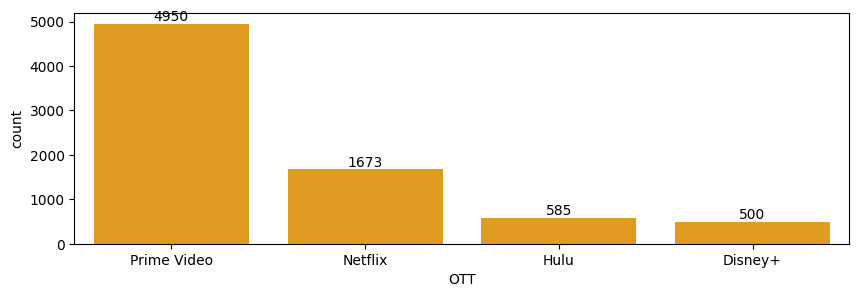

In [211]:
plt.figure(figsize=(10,3))
c = sns.countplot(plt_df,x='OTT',color='orange')
c.bar_label(c.containers[0])
plt.show()

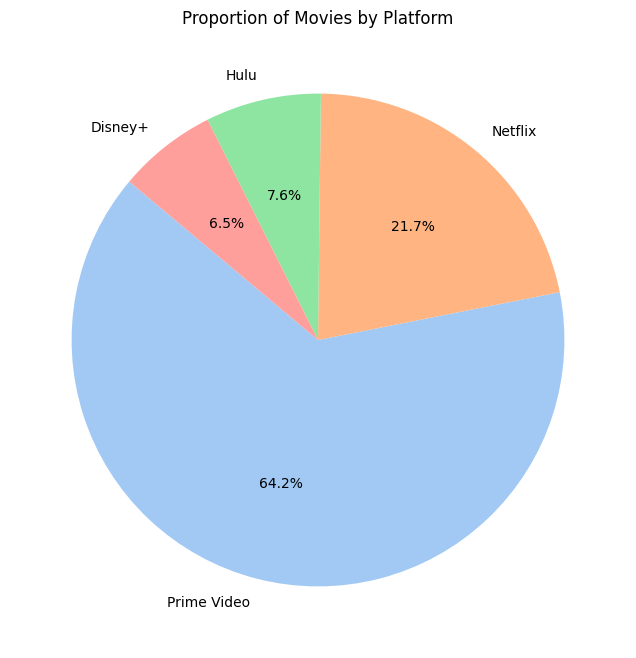

In [212]:
platform_counts = plt_df['OTT'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(platform_counts.values, labels=platform_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proportion of Movies by Platform')
plt.show()

### 2. find the no_of comedy movies available in each platforms

In [213]:
df['Genres'].str.split(',').explode().unique()

array(['Action', 'Adventure', 'Sci-Fi', 'Thriller', 'Comedy', 'Western',
       'Animation', 'Family', 'Biography', 'Drama', 'Music', 'War',
       'Crime', 'Fantasy', 'Romance', 'History', 'Mystery', 'Sport',
       'Documentary', 'Musical', 'News', 'Horror', 'Short', 'Unknown',
       'Talk-Show', 'Reality-TV', 'Film-Noir'], dtype=object)

In [214]:
df['Genres'].str.split(',').explode().value_counts()

Genres
Drama          3332
Comedy         2366
Thriller       1770
Action         1448
Horror         1091
Romance        1080
Adventure      1044
Family         1001
Crime           932
Documentary     714
Sci-Fi          706
Fantasy         686
Mystery         616
Animation       459
Biography       385
History         275
Music           258
War             238
Sport           210
Musical         210
Western         201
Short            86
News             31
Unknown          22
Talk-Show         8
Film-Noir         6
Reality-TV        5
Name: count, dtype: int64

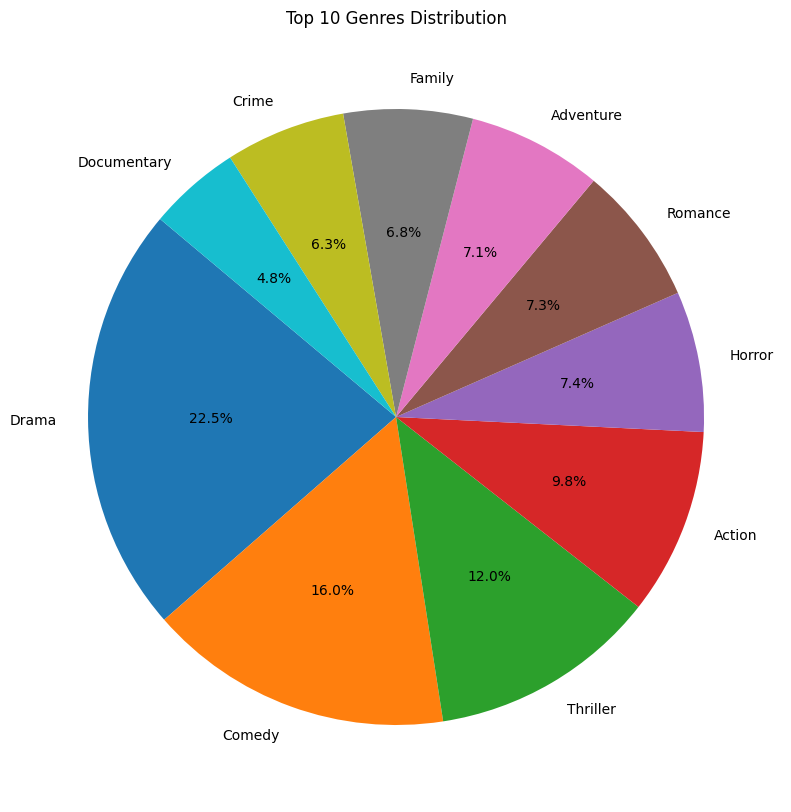

In [215]:
genre_counts = df['Genres'].str.split(',').explode().value_counts().head(10)
plt.figure(figsize=(10,10))
plt.pie(genre_counts.values, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('tab10'))
plt.title('Top 10 Genres Distribution')
plt.show()

In [216]:
df['Genres'].str.split(',').explode().reset_index()

,index,Genres
0,0,Action
1,0,Adventure
2,0,Sci-Fi
3,0,Thriller
4,1,Action
...,...,...
19175,7314,Adventure
19176,7314,Family
19177,7315,Comedy
19178,7315,Family


In [217]:
plt_df.loc[plt_df['Genres'].str.contains('Comedy',case=False),'OTT'].value_counts()

OTT
Prime Video    1368
Netflix         674
Disney+         270
Hulu            205
Name: count, dtype: int64

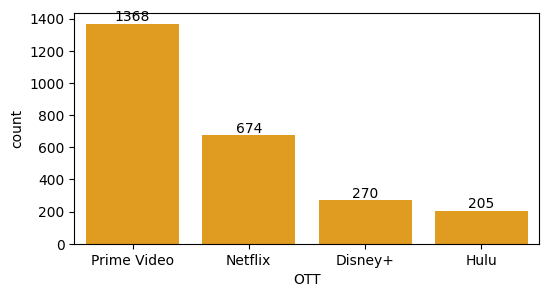

In [218]:
res = plt_df.loc[plt_df['Genres'].str.contains('Comedy',case=False),'OTT'].value_counts()
plt.figure(figsize=(6,3))
res_df = res.reset_index(name='count')
c = sns.barplot(x='OTT', y='count', data=res_df, color='orange')
c.bar_label(c.containers[0])
plt.show()

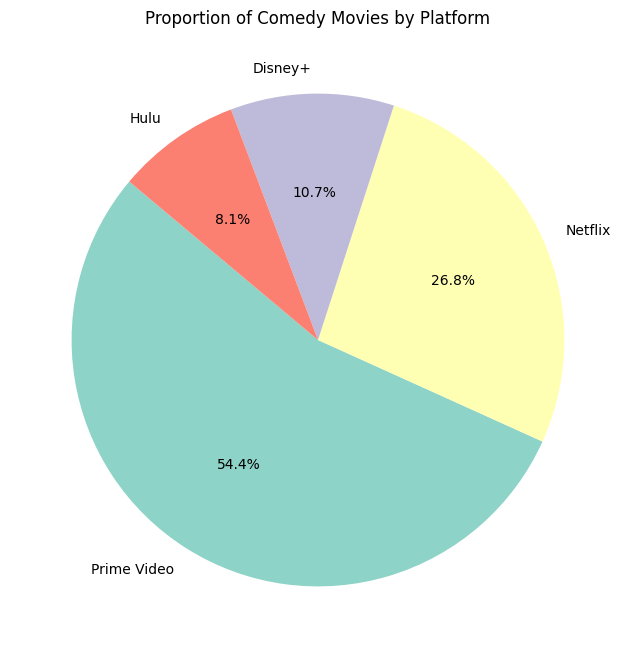

In [219]:
comedy_counts = plt_df.loc[plt_df['Genres'].str.contains('Comedy',case=False),'OTT'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(comedy_counts.values, labels=comedy_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title('Proportion of Comedy Movies by Platform')
plt.show()

In [220]:
df.loc[df['Genres'].str.contains('comedy',case=False,na=False)]

,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,Runtime_type,tot_plts,No_of_genres,No_of_countries,No_of_Languages
3,Back to the Future,1985,7+,8.5,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,Long Movie,1,3,1,1
11,3 Idiots,2009,13+,8.4,1,0,1,0,Rajkumar Hirani,"Comedy,Drama",India,"Hindi,English",170.0,Long Movie,2,2,1,2
14,Monty Python and the Holy Grail,1975,7+,8.2,1,0,0,0,"Terry Gilliam,Terry Jones","Adventure,Comedy,Fantasy",United Kingdom,"English,French,Latin",91.0,Long Movie,1,3,1,3
17,Groundhog Day,1993,7+,8.0,1,0,0,0,Harold Ramis,"Comedy,Fantasy,Romance",United States,"English,French,Italian",101.0,Long Movie,1,3,1,3
24,Life of Brian,1979,18+,8.1,1,0,0,0,Terry Jones,Comedy,United Kingdom,"English,Latin",94.0,Long Movie,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7305,Hounded,2001,all,5.1,0,0,0,1,Neal Israel,"Comedy,Drama,Family",United States,English,91.0,Long Movie,1,3,1,1
7307,The Spaceman and King Arthur,1979,all,5.3,0,0,0,1,Russ Mayberry,"Comedy,Family,Adventure,Fantasy,Sci-Fi",United States,English,93.0,Long Movie,1,5,1,1
7310,Can of Worms,1999,7+,5.0,0,0,0,1,Paul Schneider,"Comedy,Family,Sci-Fi","United States,Canada",English,90.0,Short Movie,1,3,2,1
7311,Richie Rich's Christmas Wish,1998,all,4.1,0,0,0,1,John Murlowski,"Comedy,Family",United States,English,84.0,Short Movie,1,2,1,1


### 3. find the  movies which are available in more than 1 platforms and sort the output in desc_order of tot_plts

In [221]:
df.loc[df['tot_plts']>1].sort_values('tot_plts',ascending=False)

,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,Runtime_type,tot_plts,No_of_genres,No_of_countries,No_of_Languages
491,Evolution,2001,13+,6.1,1,1,1,0,Ivan Reitman,"Comedy,Sci-Fi",United States,English,101.0,Long Movie,3,2,1,1
2184,Inside Out,2011,13+,4.5,0,1,1,1,"Pete Docter,Ronnie Del Carmen","Animation,Adventure,Comedy,Drama,Family,Fantasy",United States,English,95.0,Long Movie,3,6,1,1
297,The Interview,2014,18+,6.5,1,1,1,0,"Evan Goldberg,Seth Rogen","Action,Adventure,Comedy",United States,"English,Korean",112.0,Long Movie,3,3,1,2
1977,The Kid,2019,18+,5.9,0,1,1,1,Vincent D'Onofrio,"Biography,Drama,Western",United States,English,100.0,Long Movie,3,3,1,1
1179,Zapped,2014,all,5.1,1,1,0,1,Peter DeLuise,"Comedy,Family,Fantasy","Canada,United States",English,102.0,Long Movie,3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Jeff Dunham: Minding the Monsters,2012,13+,7.1,1,0,1,0,"Manny Rodriguez,Matthew McNeil",Comedy,United States,English,80.0,Short Movie,2,1,1,1
1171,The Little Mermaid,2018,7+,4.2,1,0,0,1,"Ron Clements,John Musker","Animation,Family,Fantasy,Musical,Romance",United States,"English,French",83.0,Short Movie,2,5,1,2
1170,Love on Delivery,1994,16+,6.9,1,0,1,0,Lik-Chi Lee,Comedy,Hong Kong,Cantonese,100.0,Long Movie,2,1,1,1
1165,Legendary Weapons of China,1982,18+,7.0,1,0,1,0,Chia-Liang Liu,"Action,Comedy,Drama",Hong Kong,"Cantonese,Mandarin",109.0,Long Movie,2,3,1,2


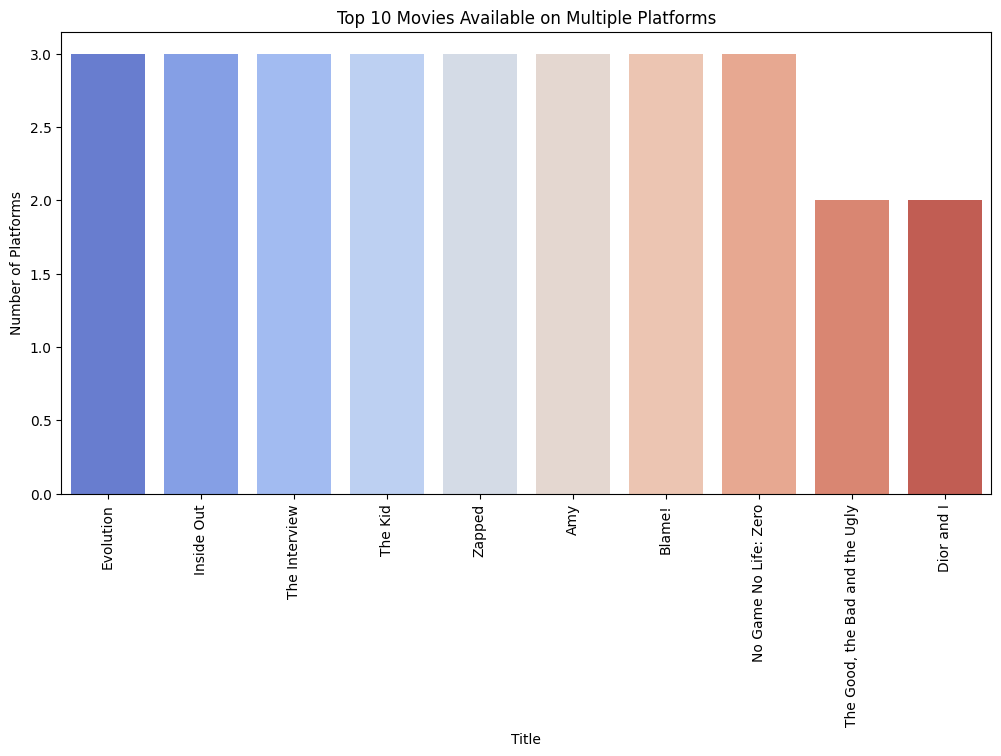

In [222]:
top_multi = df.loc[df['tot_plts']>1].sort_values('tot_plts',ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='Title', y='tot_plts', data=top_multi, palette='coolwarm')
plt.title('Top 10 Movies Available on Multiple Platforms')
plt.xticks(rotation=90)
plt.ylabel('Number of Platforms')
plt.show()

### 4. find the average IMDb ratings for all the platforms 

In [223]:
plt_df.groupby('OTT').agg({'IMDb':'mean'}).round(1)

,IMDb
OTT,
Disney+,6.4
Hulu,6.2
Netflix,6.3
Prime Video,5.6


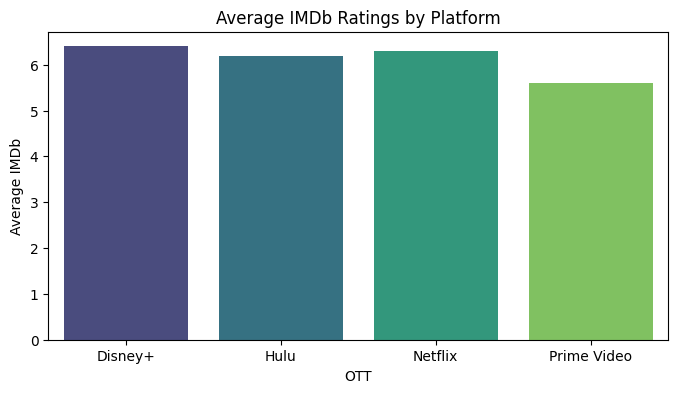

In [224]:
avg_imdb = plt_df.groupby('OTT').agg({'IMDb':'mean'}).round(1)
plt.figure(figsize=(8,4))
sns.barplot(x=avg_imdb.index, y='IMDb', data=avg_imdb, palette='viridis')
plt.title('Average IMDb Ratings by Platform')
plt.ylabel('Average IMDb')
plt.show()

### 5. find the age wise no_of_movies for all the platforms 

In [225]:
plt_df.groupby(['OTT','Age']).agg({'Title':'count'})

Title
OTT         Age       
Disney+     13+     40
            16+      1
            18+      3
            7+     179
            all    277
Hulu        13+    118
            16+     17
            18+    289
            7+     109
            all     52
Netflix     13+    381
            16+     89
            18+    752
            7+     321
            all    130
Prime Video 13+    808
            16+    225
            18+   2607
            7+     912
            all    398

In [226]:
pd.pivot_table(plt_df,index='Age',columns='OTT',values='Title',aggfunc='count',fill_value=0)

OTT,Disney+,Hulu,Netflix,Prime Video
Age,,,,
13+,40,118,381,808
16+,1,17,89,225
18+,3,289,752,2607
7+,179,109,321,912
all,277,52,130,398


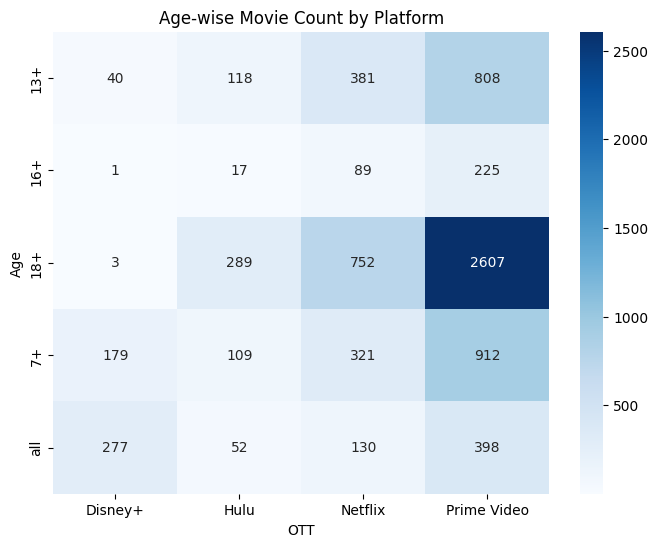

In [227]:
age_ott = pd.pivot_table(plt_df,index='Age',columns='OTT',values='Title',aggfunc='count',fill_value=0)
plt.figure(figsize=(8,6))
sns.heatmap(age_ott, annot=True, fmt='d', cmap='Blues')
plt.title('Age-wise Movie Count by Platform')
plt.show()

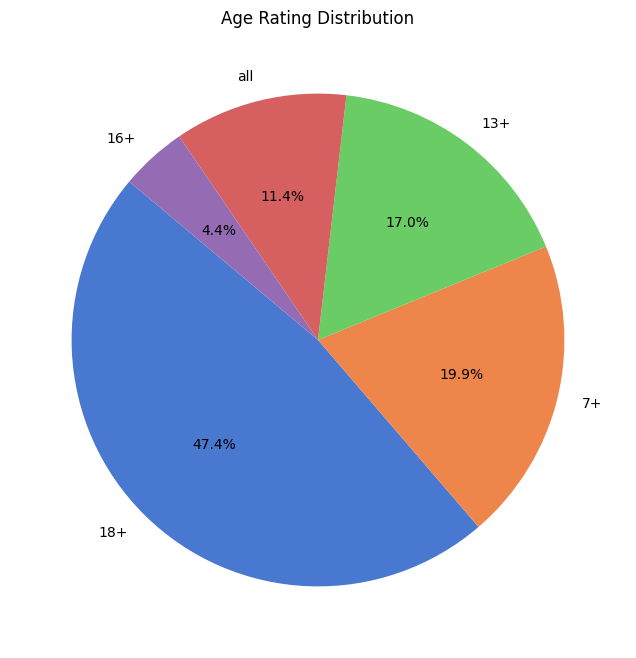

In [228]:
age_counts = df['Age'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(age_counts.values, labels=age_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('muted'))
plt.title('Age Rating Distribution')
plt.show()

### 6. find the no_of movies which has Horror Genre only 

In [229]:
df.loc[df['Genres'].str.lower() == 'horror'].shape

(195, 18)

### 7. find the no_of movies which has Horror as one of the Genre not completely Horror

In [230]:
df.loc[df['Genres'].str.contains('horror', case=False) & (df['Genres'].str.lower() != 'horror')].shape[0]

896

### 8. find the no_of movies which has Horror Genre and may or may not have other Genres

In [231]:
df.loc[df['Genres'].str.contains('horror', case=False)].shape[0]

1091

### 9. which Genre is focused more on 18+

In [232]:
# age_18 = df[df['Age'] == '18+']
# genres_18 = age_18['Genres'].str.split(',').explode()
# genres_18.value_counts().head(1)

df.loc[df['Age'] == '18+','Genres'].value_counts().idxmax()

'Comedy'

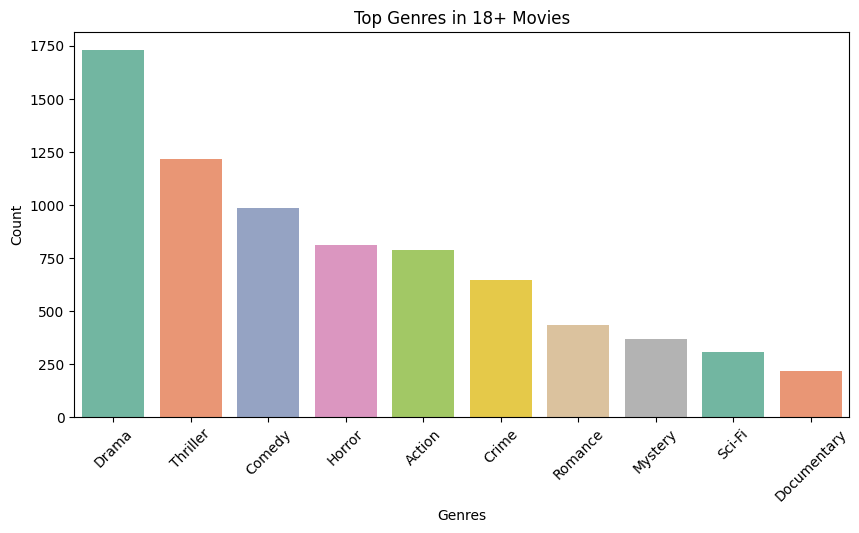

In [233]:
age_18 = df[df['Age'] == '18+']
genres_18 = age_18['Genres'].str.split(',').explode()
top_genres = genres_18.value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.index, y=top_genres.values, palette='Set2')
plt.title('Top Genres in 18+ Movies')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

### 10. which platform is focused more on 'Horror' Genre

In [234]:
plt_df.loc[plt_df['Genres'].str.contains('Horror',case=False),'OTT'].value_counts().idxmax()

'Prime Video'

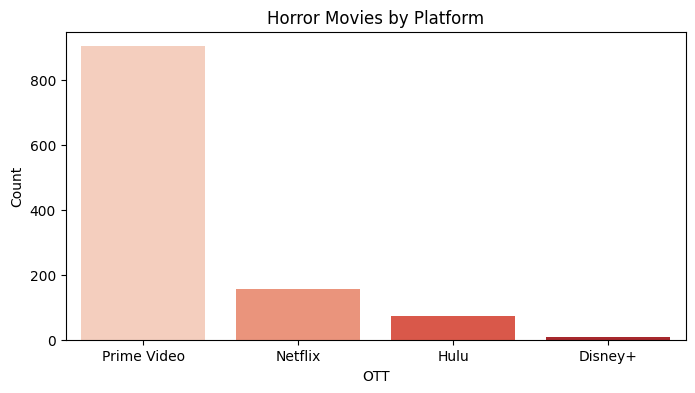

In [235]:
horror_ott = plt_df.loc[plt_df['Genres'].str.contains('Horror',case=False),'OTT'].value_counts()
plt.figure(figsize=(8,4))
sns.barplot(x=horror_ott.index, y=horror_ott.values, palette='Reds')
plt.title('Horror Movies by Platform')
plt.ylabel('Count')
plt.show()

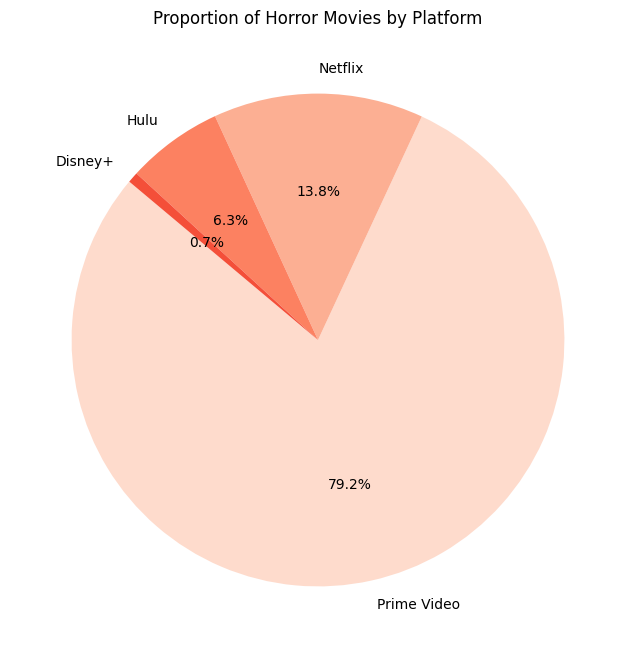

In [236]:
plt.figure(figsize=(8,8))
plt.pie(horror_ott.values, labels=horror_ott.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Reds'))
plt.title('Proportion of Horror Movies by Platform')
plt.show()

### 11. find the platform and age for which 'Horror' movie count is high

In [237]:
# horror_df = plt_df[plt_df['Genres'].str.contains('Horror',case=False)]
# horror_df.groupby(['OTT','Age']).size().sort_values(ascending=False).head(1)
plt_df.loc[plt_df['Genres'].str.contains('Horror',case=False),['OTT','Age']].value_counts().idxmax()


('Prime Video', '18+')

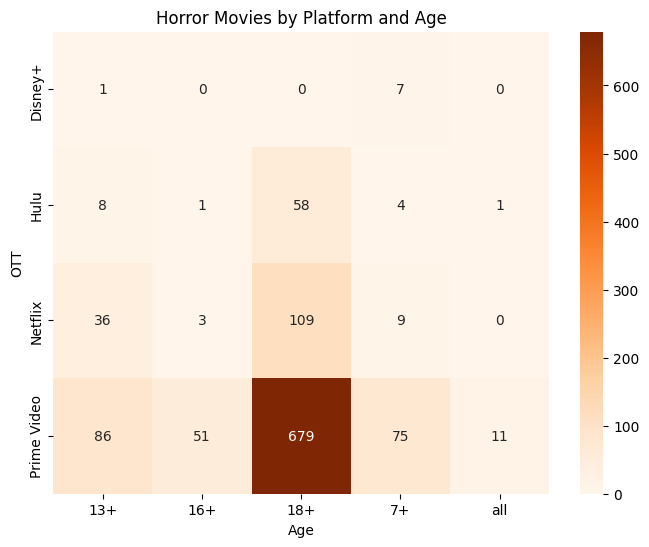

In [238]:
horror_counts = horror_df.groupby(['OTT','Age']).size().unstack(fill_value=0)
plt.figure(figsize=(8,6))
sns.heatmap(horror_counts, annot=True, fmt='d', cmap='Oranges')
plt.title('Horror Movies by Platform and Age')
plt.show()

### 12. find the top10 directors according the no_of_movies

In [239]:
df['Directors'].str.split(',').explode().value_counts().head(10)

Directors
Unknown             159
Cheh Chang           22
Jim Wynorski         22
Scott L. Montoya     16
Paul Hoen            15
Fred Olen Ray        14
Mark Atkins          12
Robert Stevenson     11
Chia-Liang Liu       11
Stuart Gillard       10
Name: count, dtype: int64

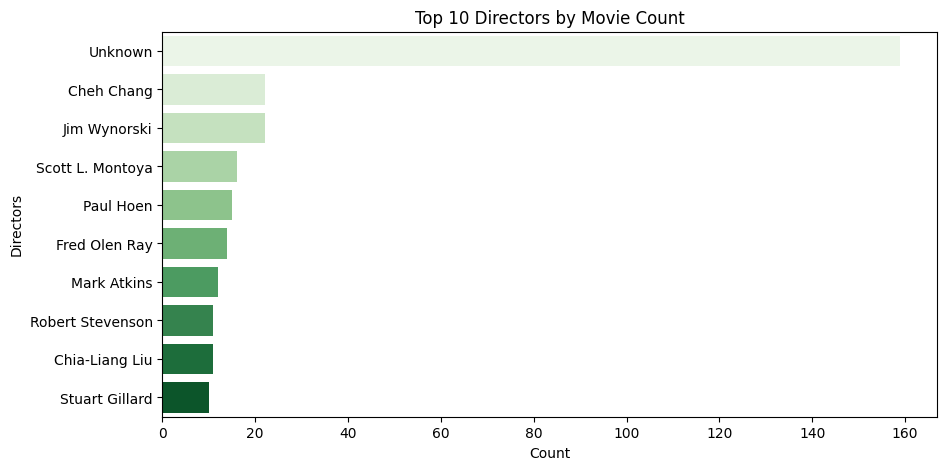

In [240]:
top_directors = df['Directors'].str.split(',').explode().value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Greens')
plt.title('Top 10 Directors by Movie Count')
plt.xlabel('Count')
plt.show()

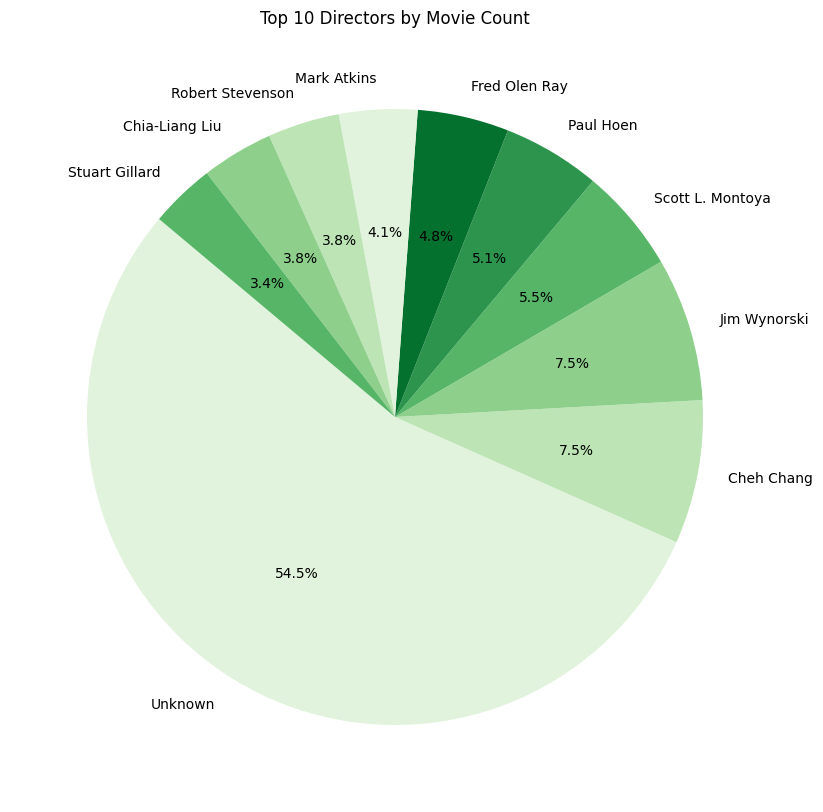

In [241]:
plt.figure(figsize=(10,10))
plt.pie(top_directors.values, labels=top_directors.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Greens'))
plt.title('Top 10 Directors by Movie Count')
plt.show()

### 13. find the bottom 10 released year according the no_of_movies released

In [242]:
df['Year'].value_counts().tail(10)

Year
1925    2
1945    1
1938    1
1915    1
1912    1
1922    1
1919    1
1920    1
1902    1
1944    1
Name: count, dtype: int64

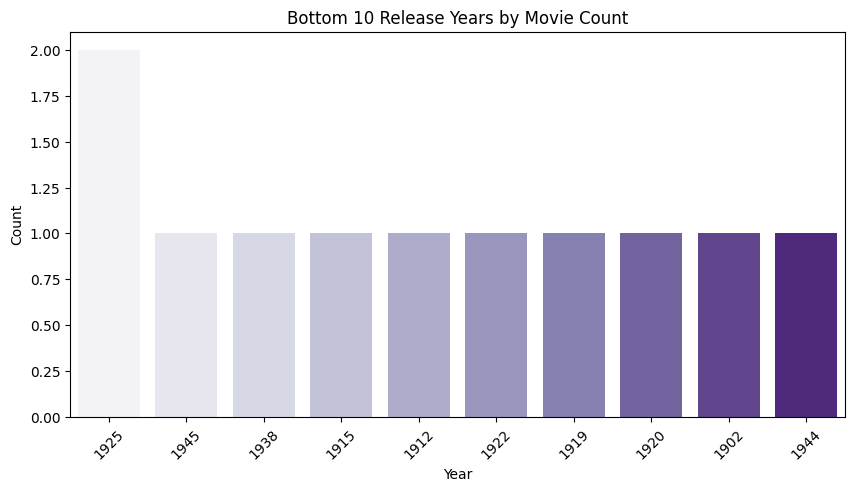

In [243]:
bottom_years = df['Year'].value_counts().tail(10)
plt.figure(figsize=(10,5))
sns.barplot(x=bottom_years.index.astype(str), y=bottom_years.values, palette='Purples')
plt.title('Bottom 10 Release Years by Movie Count')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

### 14. which movie is having highest Genres

In [244]:
df.loc[df['No_of_genres'].idxmax(),'Title']

'9'